In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV

param_grid = {
    'C': [0.01, 0.1, 1, 10],                  # Jačina regularizacije (manje C = jača regularizacija)
    'solver': ['lbfgs', 'liblinear', 'saga'], # Različiti optimizacijski algoritmi
    'penalty': ['l2'],                        # Za sada samo L2 regularizacija
}


log = LogisticRegression(max_iter=1000, random_state=42)

# Pokretanje GridSearchCV
grid_search_log = GridSearchCV(
    estimator=log,
    param_grid=param_grid,
    cv=5,
    scoring='accuracy',
    n_jobs=-1,
    verbose=1
)

# Treniranje na treniranim podacima
grid_search_log.fit(X_train_processed, y_train)

#  Prikaz najboljih rezultata
print("Najbolji parametri:", grid_search_log.best_params_)
print("Najbolji score u cross-validaciji:", grid_search_log.best_score_)


Fitting 5 folds for each of 12 candidates, totalling 60 fits
Najbolji parametri: {'C': 1, 'penalty': 'l2', 'solver': 'lbfgs'}
Najbolji score u cross-validaciji: 0.8528096169974839


Accuracy (Tuned Logistic Regression): 0.875

Classification Report:
              precision    recall  f1-score   support

           0       0.87      0.84      0.86        82
           1       0.88      0.90      0.89       102

    accuracy                           0.88       184
   macro avg       0.87      0.87      0.87       184
weighted avg       0.87      0.88      0.87       184

ROC AUC Score: 0.8717120994739359


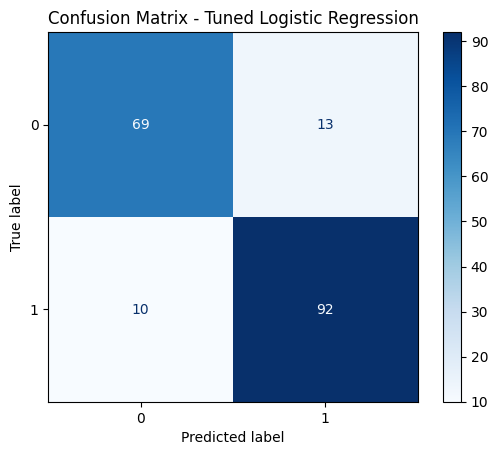

In [ ]:
from sklearn.metrics import accuracy_score, classification_report, roc_auc_score, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

best_log_model = grid_search_log.best_estimator_
y_pred_best_log = best_log_model.predict(X_test_processed)

print("Accuracy (Tuned Logistic Regression):", accuracy_score(y_test, y_pred_best_log))
print("\nClassification Report:")
print(classification_report(y_test, y_pred_best_log))
print("ROC AUC Score:", roc_auc_score(y_test, y_pred_best_log))

ConfusionMatrixDisplay.from_estimator(best_log_model, X_test_processed, y_test, cmap='Blues')
plt.title("Confusion Matrix - Tuned Logistic Regression")
plt.grid(False)
plt.show()


In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

rf = RandomForestClassifier(random_state=42)

param_grid = {
    'n_estimators': [100, 200],                # broj stabala u šumi
    'max_depth': [None, 10, 20],               # maksimalna dubina stabla
    'min_samples_split': [2, 5],               # minimalni broj uzoraka za split
    'min_samples_leaf': [1, 2],                # minimalni broj uzoraka po listu
    'max_features': ['sqrt']                   # broj karakteristika za razmatranje pri splitu
}

grid_search_rf = GridSearchCV(estimator=rf, param_grid=param_grid,
                              cv=5, scoring='accuracy', n_jobs=-1, verbose=1)

grid_search_rf.fit(X_train_processed, y_train)


Fitting 5 folds for each of 24 candidates, totalling 120 fits


,estimator,RandomForestC...ndom_state=42)
,param_grid,"{'max_depth': [None, 10, ...], 'max_features': ['sqrt'], 'min_samples_leaf': [1, 2], 'min_samples_split': [2, 5], ...}"
,scoring,'accuracy'
,n_jobs,-1
,refit,True
,cv,5
,verbose,1
,pre_dispatch,'2*n_jobs'
,error_score,nan
,return_train_score,False
,n_estimators,200


In [9]:
print("Najbolji parametri:", grid_search_rf.best_params_)
print("Najbolji score u cross-validaciji:", grid_search_rf.best_score_)


Najbolji parametri: {'max_depth': 10, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 200}
Najbolji score u cross-validaciji: 0.8651104277327368


Accuracy (Tuned Random Forest): 0.8586956521739131

Classification Report:
              precision    recall  f1-score   support

           0       0.83      0.85      0.84        82
           1       0.88      0.86      0.87       102

    accuracy                           0.86       184
   macro avg       0.86      0.86      0.86       184
weighted avg       0.86      0.86      0.86       184

ROC AUC Score: 0.9288617886178862


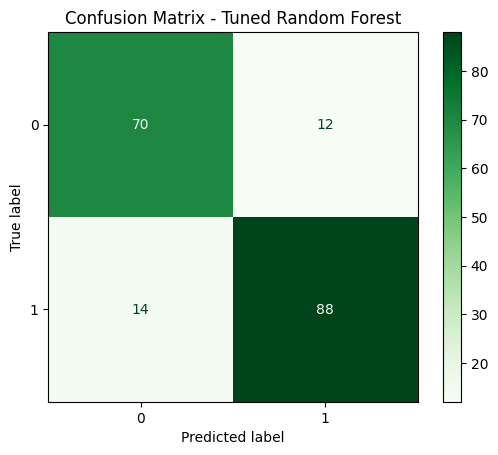

In [ ]:
from sklearn.metrics import accuracy_score, classification_report, roc_auc_score, ConfusionMatrixDisplay
import matplotlib.pyplot as plt


best_rf = grid_search_rf.best_estimator_

y_pred_best_rf = best_rf.predict(X_test_processed)

print("Accuracy (Tuned Random Forest):", accuracy_score(y_test, y_pred_best_rf))
print("\nClassification Report:")
print(classification_report(y_test, y_pred_best_rf))
print("ROC AUC Score:", roc_auc_score(y_test, best_rf.predict_proba(X_test_processed)[:, 1]))

ConfusionMatrixDisplay.from_estimator(best_rf, X_test_processed, y_test, cmap='Greens')
plt.title("Confusion Matrix - Tuned Random Forest")
plt.grid(False)
plt.show()


In [ ]:
import joblib

joblib.dump(best_log_model, "best_log_model.pkl")
joblib.dump(best_rf, "best_rf_model.pkl")



['best_rf_model.pkl']